<a href="https://colab.research.google.com/github/orkunguldali/MachineLearningFundamentalsLecture/blob/main/Lab6_HyperparameterTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [47]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [48]:
labels = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}


In [49]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels_encoded = y_data[selected_ind]
  selected_labels = [labels[x[0]] for x in selected_labels_encoded]

  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img)

  for id_label, label in enumerate(selected_labels):
    plt.text((32/2) + 32*id_label - len(label), 32*(5/4), label)
  plt.axis('off')
  plt.show()

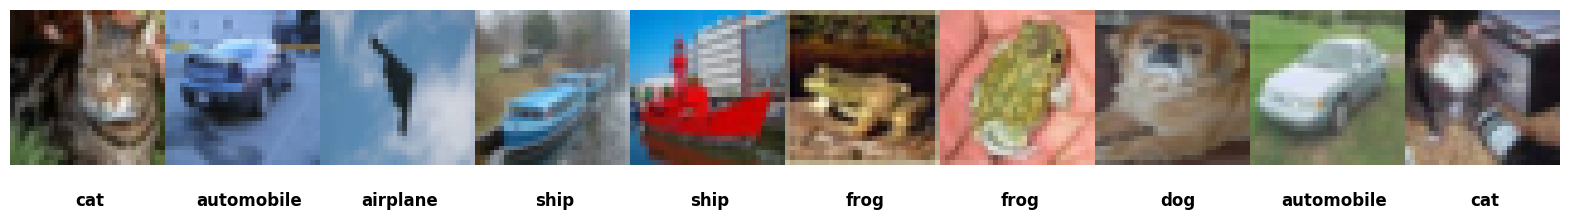

In [50]:
display_random_images(X_train, y_train)


In [51]:
X_train.shape


(50000, 32, 32, 3)

In [52]:
def display_channels_separately(image: np.array) -> None:

  plt.figure()
  fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))


  axs[0].imshow(image[:,:,0],cmap='Reds')
  axs[1].imshow(image[:,:,1],cmap='Blues')
  axs[2].imshow(image[:,:,2],cmap='Greens')

  axs[3].imshow(image)

  plt.show()

<Figure size 640x480 with 0 Axes>

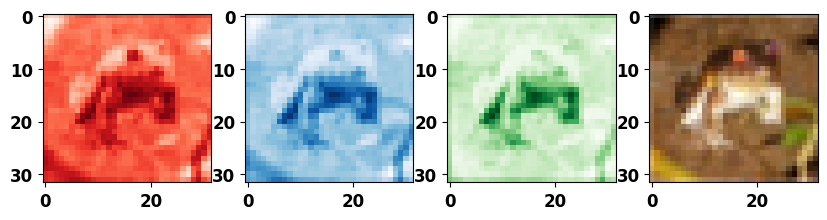

In [53]:
display_channels_separately(X_train[0])


In [54]:
X_train_scaled = X_train.astype('float32') / 255.0


In [55]:
y_train_encoded = to_categorical(y_train, num_classes=10)


In [56]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))


In [57]:
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 3072)              0         
                                                                 
 dense_19 (Dense)            (None, 256)               786688    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 64)                16448     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 10)                650       
                                                                 
Total params: 803786 (3.07 MB)
Trainable params: 80378

In [58]:
optimizer = SGD(learning_rate = 0.006)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [59]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=60, validation_split = 0.2)


Epoch 1/100
667/667 [==============================] - 4s 5ms/step - loss: 2.0677 - accuracy: 0.2445 - val_loss: 1.9215 - val_accuracy: 0.3144
Epoch 2/100
667/667 [==============================] - 3s 5ms/step - loss: 1.8993 - accuracy: 0.3187 - val_loss: 1.8254 - val_accuracy: 0.3571
Epoch 3/100
667/667 [==============================] - 3s 5ms/step - loss: 1.8324 - accuracy: 0.3484 - val_loss: 1.7832 - val_accuracy: 0.3696
Epoch 4/100
667/667 [==============================] - 3s 4ms/step - loss: 1.7841 - accuracy: 0.3667 - val_loss: 1.7618 - val_accuracy: 0.3772
Epoch 5/100
667/667 [==============================] - 2s 4ms/step - loss: 1.7493 - accuracy: 0.3783 - val_loss: 1.7039 - val_accuracy: 0.4039
Epoch 6/100
667/667 [==============================] - 3s 4ms/step - loss: 1.7193 - accuracy: 0.3890 - val_loss: 1.6893 - val_accuracy: 0.4061
Epoch 7/100
667/667 [==============================] - 3s 5ms/step - loss: 1.6916 - accuracy: 0.3997 - val_loss: 1.6694 - val_accuracy: 0.4135

In [60]:
X_test = X_test.astype('float32') / 255.0
y_test_encoded = to_categorical(y_test, num_classes=10)

In [61]:
score = model.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 1.3295985460281372
Test accuracy: 53.359997272491455 %


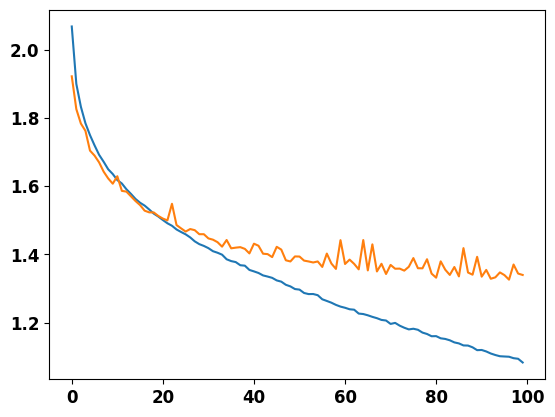

In [62]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

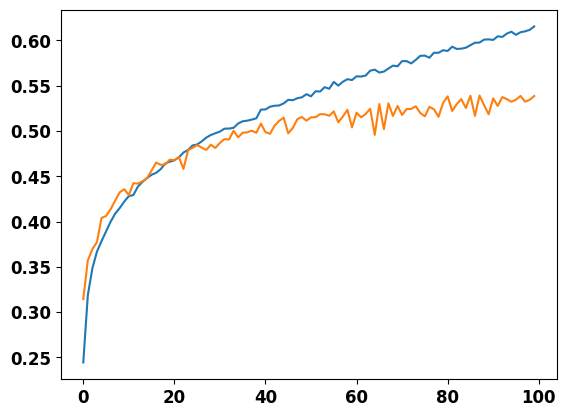

In [63]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [64]:
def show_the_best_predictions(model, x_test: np.array, y_test: np.array, n_of_pred: int = 10) -> None:
  mapping = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

  predictions = model.predict(x_test)
  y_test = y_test.reshape(1,-1)
  predictions_ind = np.argmax(predictions, axis=1)
  predictions_ind = predictions_ind.reshape(1, -1)

  corect_predictions = np.where(predictions_ind == y_test)

  rows_correct = corect_predictions[1]
  predictedtions_correct = predictions[rows_correct]
  target_correct = y_test[0][rows_correct]

  max_samples = predictions[rows_correct, target_correct]
  selected_images = x_test[rows_correct]
  sorted_ind = np.argsort(max_samples)[::-1]


  images = []
  prob = []
  labels = []


  for ind in range(n_of_pred):

    index = sorted_ind[ind]

    labels.append(target_correct[index])
    prob.append(max_samples[index])
    images.append(selected_images[index])

  plt.figure(figsize=(20,10))

  images = np.concatenate(np.asarray(images),axis=1)
  plt.imshow(images)
  for ins in range(n_of_pred):
    texts = '{}: \n{:.3f} %'.format(mapping[labels[ins]], prob[ins]*100)
    plt.text((32/2) + 32*ins - len(mapping[labels[ins]]), 32*(5/4), texts)

  plt.axis('off')
  plt.show()

313/313 [==============================] - 1s 2ms/step


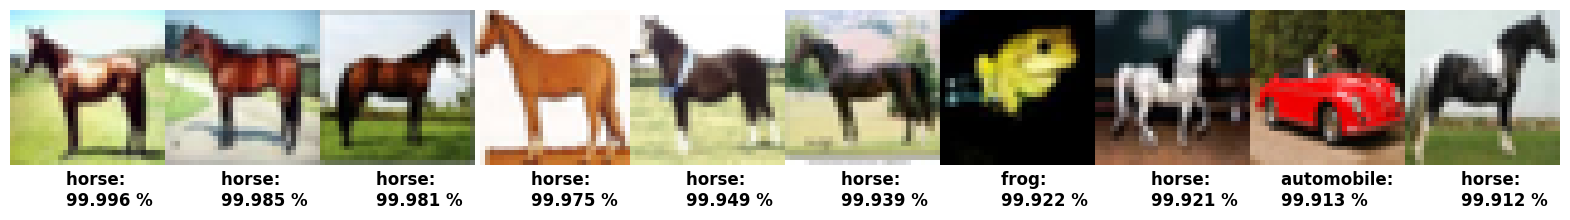

In [65]:
show_the_best_predictions(model, X_test, y_test)


I tried to add some dropout filters and also change the hyperparameters. I found out that more layers might complicate the system and lower the results instead of system learning better. Also, changing learning rate significantly changed the results and how fast the machine is learning. When learning rate is low, the starting value of the accuracies is much lower and it requires much more number of epochs to get the same results as the other results. I also tried some other types of functions but relu and softmax seemed to be better. After my last attempts I tried to increase the number of epochs but the validation accuracy maintained almost the same value although the accuracy increased after 100-or so epochs. Therefore, I assumed 100 would be a good value for this setup.